# Name: Jesse Oseafiana
# Assignment: Module 3

In [199]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [200]:
df = pd.read_csv('soci_econ_country_profiles.csv')
df.head()

,Unnamed: 0,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,...,NaN,79.726,72.924,76.372000,0.856138,22572521.0,21472290.0,10.955501,12.929913,91.749
1,1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,...,1.948647,84.600,80.500,82.500000,2.007966,12349632.0,12252228.0,21.915859,64.110306,85.904
2,2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,...,2.081269,84.000,79.400,81.643902,0.756179,4478340.0,4319226.0,25.355237,27.024073,58.094
3,3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,...,6.031837,79.200,69.300,74.129268,1.162417,5077542.0,4420722.0,13.019006,2.933101,78.134
4,4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,...,2.125971,83.900,79.200,81.492683,0.910371,5766141.0,5609017.0,23.399721,33.727746,97.961


# Columns

In [201]:
len(df.columns)

96

In [202]:
for col in df.columns:
    print(col)

Unnamed: 0
country
Region
Surface area (km2)
Population in thousands (2017)
Population density (per km2, 2017)
Sex ratio (m per 100 f, 2017)
GDP: Gross domestic product (million current US$)
GDP growth rate (annual %, const. 2005 prices)
GDP per capita (current US$)
Economy: Agriculture (% of GVA)
Economy: Industry (% of GVA)
Economy: Services and other activity (% of GVA)
Employment: Agriculture (% of employed)
Employment: Industry (% of employed)
Employment: Services (% of employed)
Unemployment (% of labour force)
Labour force participation (female/male pop. %)
Agricultural production index (2004-2006=100)
Food production index (2004-2006=100)
International trade: Exports (million US$)
International trade: Imports (million US$)
International trade: Balance (million US$)
Balance of payments, current account (million US$)
Population growth rate (average annual %)
Urban population (% of total population)_x
Urban population growth rate (average annual %)
Fertility rate, total (live birt

# Lets find the top 10 most similar items to the following query items: GDP per capita (current US$), Purchasing Power Index, Safety Index

In [203]:
# GDP per capita (current US$)

data = df[['GDP per capita (current US$)']]

# Handle missing data
data = data.fillna(data.mean())

# Normalize data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=data.columns, index=data.index)

# Organize Index
query_index = 0
query = normalized_data.iloc[query_index]

# Calculate distance and Print top 10 similar countries
similarity_distance = []

for i in range(len(normalized_data)):
    if i != query_index:
        dist = distance.euclidean(query, normalized_data.iloc[i])
        similarity_distance.append((i, dist))

top_10 = sorted(similarity_distance, key=lambda x: x[1])[:10]
top_10_countries = [df.iloc[i[0]]['country'] for i in top_10]

# Print the top 10 most similar countries with rankings
for rank, country_index in enumerate(top_10, start=1):
    country_name = df.iloc[country_index[0]]['country']
    print(f"{rank}. {country_name}")


1. Lithuania
2. Chile
3. Slovakia
4. Poland
5. Hungary
6. Estonia
7. Czechia
8. Croatia
9. Greece
10. Venezuela (Bolivarian Republic of)


In [204]:
# Purchasing Power Index

data = df[['Purchasing Power Index']]

# Handle missing data
data = data.fillna(data.mean())

# Normalize data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=data.columns, index=data.index)

# Organize Index
query_index = 0
query = normalized_data.iloc[query_index]

# Calculate distance and Print top 10 similar countries
similarity_distance = []

for i in range(len(normalized_data)):
    if i != query_index:
        dist = distance.euclidean(query, normalized_data.iloc[i])
        similarity_distance.append((i, dist))

top_10 = sorted(similarity_distance, key=lambda x: x[1])[:10]
top_10_countries = [df.iloc[i[0]]['country'] for i in top_10]

# Print the top 10 most similar countries with rankings
for rank, country_index in enumerate(top_10, start=1):
    country_name = df.iloc[country_index[0]]['country']
    print(f"{rank}. {country_name}")

1. Greece
2. Mexico
3. Croatia
4. Turkey
5. Chile
6. Portugal
7. Lebanon
8. Romania
9. Slovakia
10. Lithuania


In [205]:
# Safety Index

data = df[['Safety Index']]

# Handle missing data
data = data.fillna(data.mean())

# Normalize data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=data.columns, index=data.index)

# Organize Index
query_index = 0
query = normalized_data.iloc[query_index]

# Calculate distance and Print top 10 similar countries
similarity_distance = []

for i in range(len(normalized_data)):
    if i != query_index:
        dist = distance.euclidean(query, normalized_data.iloc[i])
        similarity_distance.append((i, dist))

top_10 = sorted(similarity_distance, key=lambda x: x[1])[:10]
top_10_countries = [df.iloc[i[0]]['country'] for i in top_10]

# Print the top 10 most similar countries with rankings
for rank, country_index in enumerate(top_10, start=1):
    country_name = df.iloc[country_index[0]]['country']
    print(f"{rank}. {country_name}")

1. Malaysia
2. Brazil
3. Pakistan
4. Vietnam
5. Egypt
6. Colombia
7. Ukraine
8. Iran (Islamic Republic of)
9. Mexico
10. Thailand


In [206]:
# GDP per capita (current US$), Purchasing Power Index,  & Safety Index

data = df[[
    'GDP per capita (current US$)', 
    'Purchasing Power Index', 
    'Safety Index'
    ]]

# Handle missing data
data = data.fillna(data.mean())

# Normalize data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=data.columns, index=data.index)

# Organize Index
query_index = 0
query = normalized_data.iloc[query_index]

# Calculate distance and Print top 10 similar countries
similarity_distance = []

for i in range(len(normalized_data)):
    if i != query_index:
        dist = distance.euclidean(query, normalized_data.iloc[i])
        similarity_distance.append((i, dist))

top_10 = sorted(similarity_distance, key=lambda x: x[1])[:10]
top_10_countries = [df.iloc[i[0]]['country'] for i in top_10]

# Print the top 10 most similar countries with rankings
for rank, country_index in enumerate(top_10, start=1):
    country_name = df.iloc[country_index[0]]['country']
    print(f"{rank}. {country_name}")

1. Malaysia
2. Brazil
3. Mexico
4. Lebanon
5. Chile
6. Iran (Islamic Republic of)
7. Colombia
8. Pakistan
9. Russian Federation
10. Thailand


# Analyze and Clean Data

In [207]:
#  Handling missing data
columns = [
    'Quality Of Life Index',
    'GDP per capita (current US$)',
    'Purchasing Power Index',
    'Safety Index'
]

df[columns] = df[columns].fillna(df[columns].mean())

# Check for missing data
missing_data = df.isna()
present_missing_data = missing_data.any().any()

if present_missing_data:
    print("Missing data is present")
    counter = missing_data.sum()
    print("Missing data column:")
    print(counter)
else:
    print("No missing data present")

Missing data is present
Missing data column:
Unnamed: 0                                                   0
country                                                      0
Region                                                       0
Surface area (km2)                                           0
Population in thousands (2017)                               0
                                                            ..
Population, female                                           0
Population, male                                             0
Tax revenue (% of GDP)                                       8
Taxes on income, profits and capital gains (% of revenue)    9
Urban population (% of total population)_y                   0
Length: 96, dtype: int64


In [208]:
# Handle Missing Data
df['Tax revenue (% of GDP)'] = df['Tax revenue (% of GDP)'].fillna(df['Tax revenue (% of GDP)'].mean())
df['Taxes on income, profits and capital gains (% of revenue)'] = df['Taxes on income, profits and capital gains (% of revenue)'].fillna(df['Taxes on income, profits and capital gains (% of revenue)'].mean())

In [209]:
# Re-check for missing data
missing_data = df.isna()
present_missing_data = missing_data.any().any()

if present_missing_data:
    print("Missing data is present")
    counter = missing_data.sum()
    print("Missing data column:")
    print(counter)
else:
    print("No missing data present")

Missing data is present
Missing data column:
Unnamed: 0                                                   0
country                                                      0
Region                                                       0
Surface area (km2)                                           0
Population in thousands (2017)                               0
                                                            ..
Population, female                                           0
Population, male                                             0
Tax revenue (% of GDP)                                       0
Taxes on income, profits and capital gains (% of revenue)    0
Urban population (% of total population)_y                   0
Length: 96, dtype: int64


In [210]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if 'Quality of Life Index' column exists
if 'Quality Of Life Index' in numeric_df.columns:
    # Compute the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Extract the correlation with 'Quality of Life Index'
    correlation_quality_of_life = correlation_matrix['Quality Of Life Index']

    # Print the correlations
    print("Correlation between Quality Of Life Index and other columns:")
    print(correlation_quality_of_life)
else:
    print("Column 'Quality Of Life Index' not found in DataFrame.")

Correlation between Quality Of Life Index and other columns:
Unnamed: 0                                                  -0.212089
Surface area (km2)                                          -0.107855
Population in thousands (2017)                              -0.230366
Population density (per km2, 2017)                          -0.193296
Sex ratio (m per 100 f, 2017)                               -0.007246
                                                               ...   
Population, female                                          -0.232637
Population, male                                            -0.228347
Tax revenue (% of GDP)                                       0.370937
Taxes on income, profits and capital gains (% of revenue)    0.050629
Urban population (% of total population)_y                   0.291156
Name: Quality Of Life Index, Length: 78, dtype: float64


In [211]:
#  Top 10 attributes with the highest correlation with 'Quality of Life Index'
correlation_quality_of_life = correlation_matrix['Quality Of Life Index']
top_10_correlation = correlation_quality_of_life.drop('Quality Of Life Index').sort_index(ascending=False).head(10)
print("Top 10 with the highest correlation with 'Quality of Life Index':")
print(top_10_correlation)

Top 10 with the highest correlation with 'Quality of Life Index':
Urban population (% of total population)_y                   0.291156
Urban population (% of total population)_x                   0.300472
Unnamed: 0                                                  -0.212089
Unemployment (% of labour force)                             0.127378
Traffic commute time index                                  -0.645900
Threatened species (number)                                  0.057125
Taxes on income, profits and capital gains (% of revenue)    0.050629
Tax revenue (% of GDP)                                       0.370937
Surface area (km2)                                          -0.107855
Sex ratio (m per 100 f, 2017)                               -0.007246
Name: Quality Of Life Index, dtype: float64


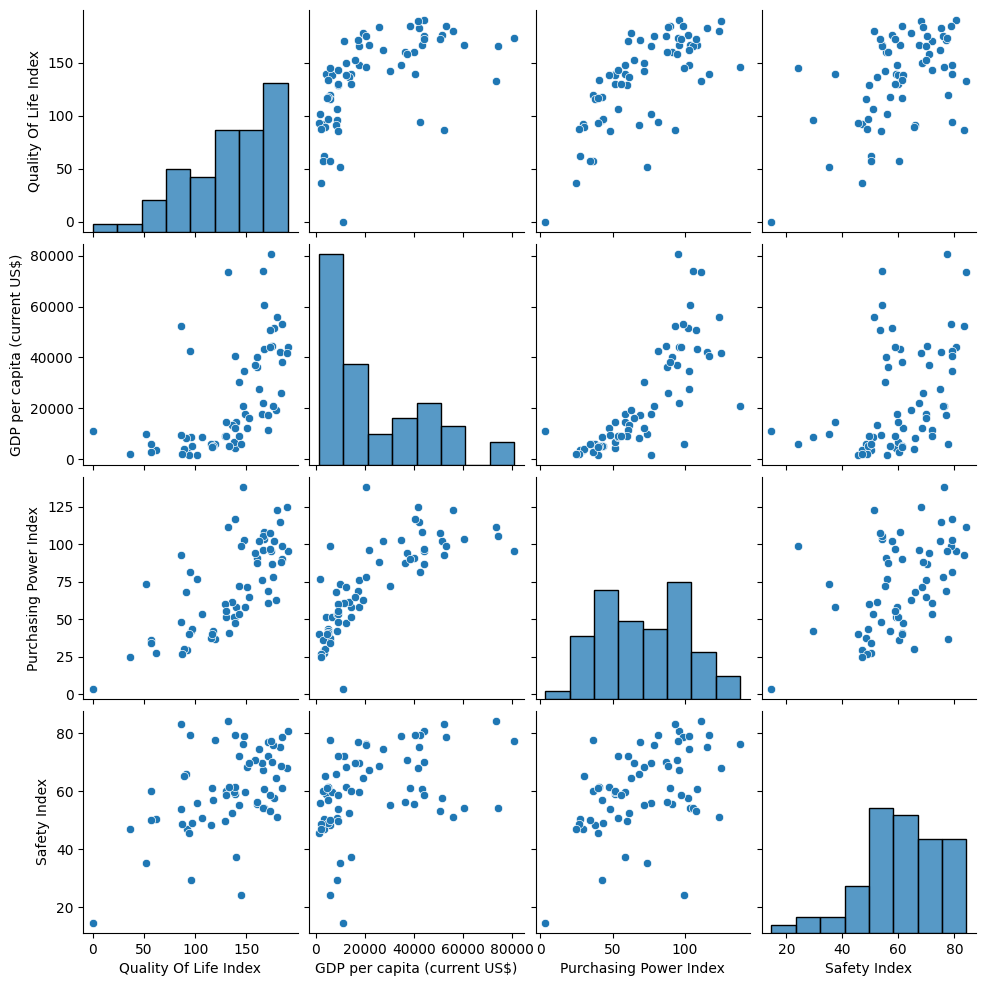

In [212]:
# Define the attributes you're interested in
attributes = [
    'Quality Of Life Index',
    'GDP per capita (current US$)',
    'Purchasing Power Index',
    'Safety Index'
]

# Convert the specified columns to numeric, in case they're not
for col in attributes:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values by dropping rows with NaNs in the specified columns
df.dropna(subset=attributes, inplace=True)

# Create a pairplot for the specified attributes
sns.pairplot(df[attributes])

# Display the plot
plt.show()